# Titanic Solution using Machine Learning and Deep Learning

In [1]:
# import required libraries
import pandas as pd
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
#Classification models and model evaluation libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
#Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
df1 = pd.read_csv("train.csv")#Reading data from csv file

In [3]:
df1.shape

(891, 12)

In [4]:
df2 =  pd.read_csv("test.csv")

In [5]:
df2.shape

(418, 11)

In [6]:
df = df1.append(df2) # Add df2 to df1 and assign to df

C:\Users\fa\AppData\Local\Temp\ipykernel_10960\3077441328.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2) # Add df2 to df1 and assign to df


In [7]:
df.shape

(1309, 12)

## EDA - Exploratory Data Analysis 

In [8]:
df.head()  #Show the first 5 rows in the data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.sample(20) #Show 20 random rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
450,451,0.0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,NaN,S
253,1145,NaN,3,"Salander, Mr. Karl Johan",male,24.0,0,0,7266,9.3250,NaN,S
757,758,0.0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S
401,1293,NaN,2,"Gale, Mr. Harry",male,38.0,1,0,28664,21.0000,NaN,S
518,519,1.0,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S
220,221,1.0,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
90,982,NaN,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,NaN,S
719,720,0.0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
377,1269,NaN,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,NaN,S
363,364,0.0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S


In [10]:
df.info()  #Give information about columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()  #Detect missing values

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df = df.drop('Cabin',axis=1) #Extract Cabin column from dataframe

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [14]:
df.Embarked.value_counts() # How many passengers embarking from which port?

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
df.Embarked.value_counts(normalize=True) #69 percent of passengers from S port

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

## Feature Engineering

In [16]:
df['Title'] = df['Name'].str.extract(" ([A-Za-z]+)\.",expand=False) #Find titles from names 

In [17]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [18]:
df['Title'] = df['Title'].replace(['Ms','Mlle'],'Miss') #Replace Ms and Mlle with Miss
df['Title'] = df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title'] = df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt'],'Mr')

In [19]:
df['Senior'] = df['Age'].map(lambda s:1 if s>70 else 0) #For passengers over 70, put 1 in the senior column

In [20]:
df.groupby('Sex')['Age'].mean() #Average age of passengers by gender

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [21]:
df.describe()  #Generate descriptive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [22]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
Title            0
Senior           0
dtype: int64

In [23]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'),inplace = True) #Fill nulls in the age column with either the median of each title
df.groupby('Title')['Age'].transform('median')

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1307 non-null   object 
 11  Title        1309 non-null   object 
 12  Senior       1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [25]:
df['Fare'].fillna(df['Fare'].mean(),inplace = True) #Fill null values in the Fare column with the mean of the Fare


In [26]:
df['Family'] = df['SibSp'] + df['Parch'] + 1  #Add the number of siblings and parents of the passenger to find the number of person in the family

<AxesSubplot:>

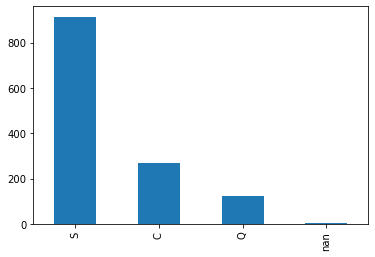

In [27]:
df.Embarked.value_counts(dropna=False).plot(kind='bar')

In [28]:
df['Embarked']=df['Embarked'].fillna('S') #Fill null values in the Embarked column with S.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

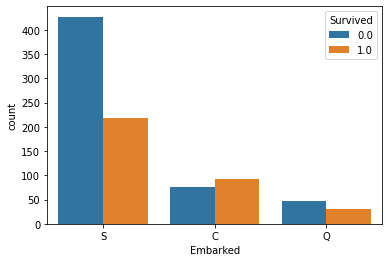

In [29]:
sns.countplot(x = 'Embarked', hue = 'Survived', data=df) #Show survivors by ports embarked

<AxesSubplot:ylabel='Frequency'>

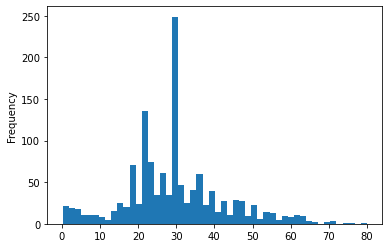

In [30]:
df.Age.plot(kind='hist',bins=50)

In [31]:
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [32]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
Senior           0
Family           0
dtype: int64

In [33]:
#Categorize passengers as single, small, medium, large according to the number of person in their family.
df['Single'] = np.where(df.Family<2,1,0) 
df['Small'] = np.where((df.Family>1)&(df.Family<5),1,0)
df['Medium']= np.where((df.Family>4)&(df.Family<7),1,0)
df['Large']=np.where(df.Family>6,1,0)

In [34]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Senior,Family,Single,Small,Medium,Large
363,1255,NaN,3,"Strilic, Mr. Ivan",male,27.0,0,0,315083,8.6625,S,Mr,0,1,1,0,0,0
213,214,0.0,2,"Givard, Mr. Hans Kristensen",male,30.0,0,0,250646,13.0000,S,Mr,0,1,1,0,0,0
411,412,0.0,3,"Hart, Mr. Henry",male,30.0,0,0,394140,6.8583,Q,Mr,0,1,1,0,0,0
30,922,NaN,2,"Louch, Mr. Charles Alexander",male,50.0,1,0,SC/AH 3085,26.0000,S,Mr,0,2,0,1,0,0
562,563,0.0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,S,Mr,0,1,1,0,0,0
594,595,0.0,2,"Chapman, Mr. John Henry",male,37.0,1,0,SC/AH 29037,26.0000,S,Mr,0,2,0,1,0,0
572,573,1.0,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.0,0,0,PC 17474,26.3875,S,Mr,0,1,1,0,0,0
161,162,1.0,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,S,Mrs,0,1,1,0,0,0
828,829,1.0,3,"McCormack, Mr. Thomas Joseph",male,30.0,0,0,367228,7.7500,Q,Mr,0,1,1,0,0,0
309,310,1.0,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,C,Miss,0,1,1,0,0,0


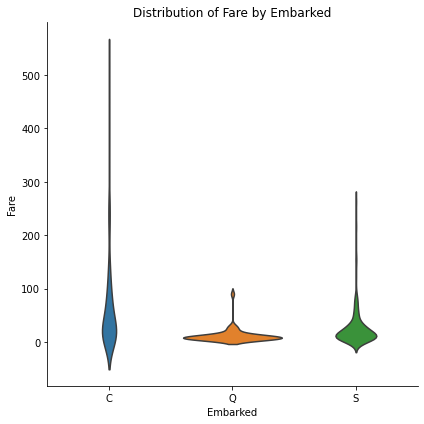

In [35]:
sns.catplot(x='Embarked', y='Fare', kind='violin', inner=None, data=df,height =6,order = ['C','Q','S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

## Classification-Machine Learning

In [36]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True) #Extract PassengerId, Ticket and Name columns from dataframe
df_dummies = pd.get_dummies(df, drop_first=True) #Dummy variable drop_first deletes first column, get_dummies Convert categorical variable into dummy/indicator variables.



In [37]:
df_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,0,1,0,0,1,0,1,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,0,1,0,0,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,1,0,0,0,0,0,1,0,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,0,1,0,0,0,0,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,1,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,0,1,1,0,0,0,1,0,1,0,0,1,0
414,NaN,1,39.0,0,0,108.9000,0,1,1,0,0,0,0,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,0,1,1,0,0,0,1,0,1,0,0,1,0
416,NaN,3,30.0,0,0,8.0500,0,1,1,0,0,0,1,0,1,0,0,1,0


In [38]:
df_train=df_dummies[:891] #First 891 rows for model training
df_test=df_dummies[891:] #For test data

In [39]:
df_train.shape,df_test.shape

((891, 19), (418, 19))

In [40]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,0,1,0,0,1,0,1,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,0,1,0,0,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,1,0,0,0,0,0,1,0,1,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,0,1,0,0,0,0,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,1,0,0,0,1,0,1,0,0,1,0


In [41]:
del df_train['Survived'] # Remove Survived columns from train data

In [42]:
y=df1['Survived']

In [43]:
#Classification algorithms
gbc = GradientBoostingClassifier()
r = RandomForestClassifier()
d = DecisionTreeClassifier()
log = LogisticRegression()
k = KNeighborsClassifier()
g = GaussianNB()
b = BernoulliNB()
algorithms = [g,b,k,log,gbc,r,d]
names=['GaussianNB','BernouliNB','K Nearest','Logistic','GradientBoosting','RandomForest','Decision Tree']

In [44]:
# PURPOSE: Train the data in 7 classification models and see the results in tabular form
# PARAMETERS: X: Dataframe containing training data, y: Output variable, algorithms
# RETURN: Show model evaluation metrics in ascending order by f1 score
def algo_testing(X, y, algorithms = algorithms, names = names):
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(X,y)  #Learning from training data with fit. Model learns by looking at x versus y data
    accuracy=[]
    precision=[]
    recall=[]
    f1=[]
    #calculate model evaluation metrics
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y, algorithms[i].predict(X)))#Trained model predicts the output with predict command
        precision.append(precision_score(y, algorithms[i].predict(X)))
        recall.append(recall_score(y,algorithms[i].predict(X)))
        f1.append(f1_score(y, algorithms[i].predict(X)))
    metrics = pd.DataFrame(columns = ['Accuracy','Precision','Recall','F1'], index = names)
    metrics['Accuracy']=accuracy
    metrics['Precision']=precision
    metrics['Recall']=recall
    metrics['F1']=f1
    return metrics.sort_values('F1', ascending = False)

In [45]:
algo_testing(df_train,y)

C:\Users\fa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall,F1
RandomForest,0.979798,0.973684,0.973684,0.973684
Decision Tree,0.979798,0.993902,0.953216,0.973134
GradientBoosting,0.897868,0.911475,0.812865,0.859351
Logistic,0.829405,0.798742,0.742690,0.769697
GaussianNB,0.821549,0.768328,0.766082,0.767204
K Nearest,0.818182,0.794118,0.710526,0.750000
BernouliNB,0.805836,0.749263,0.742690,0.745962


In [46]:
df_test.shape

(418, 19)

In [47]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,0,1,1,0,0,0,1,1,0,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,0,2,0,1,0,0,0,0,1,0,0,0,1
2,NaN,2,62.0,0,0,9.6875,0,1,1,0,0,0,1,1,0,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,0,1,1,0,0,0,1,0,1,0,0,1,0
4,NaN,3,22.0,1,1,12.2875,0,3,0,1,0,0,0,0,1,0,0,0,1


In [48]:
del df_test['Survived']

In [49]:
tahmin = d.predict(df_test)  #The algorithm that gives the best results is the decision tree. Predict for test data

In [50]:
tahmin

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [51]:
df_test['Survived']=tahmin #Add results to test dataframe 

C:\Users\fa\AppData\Local\Temp\ipykernel_10960\1384894926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Survived']=tahmin #Add results to test dataframe


In [52]:
df_test.head(418)

,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Survived
0,3,34.5,0,0,7.8292,0,1,1,0,0,0,1,1,0,0,0,1,0,0
1,3,47.0,1,0,7.0000,0,2,0,1,0,0,0,0,1,0,0,0,1,1
2,2,62.0,0,0,9.6875,0,1,1,0,0,0,1,1,0,0,0,1,0,1
3,3,27.0,0,0,8.6625,0,1,1,0,0,0,1,0,1,0,0,1,0,1
4,3,22.0,1,1,12.2875,0,3,0,1,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,0,1,1,0,0,0,1,0,1,0,0,1,0,0
414,1,39.0,0,0,108.9000,0,1,1,0,0,0,0,0,0,0,0,0,1,1
415,3,38.5,0,0,7.2500,0,1,1,0,0,0,1,0,1,0,0,1,0,0
416,3,30.0,0,0,8.0500,0,1,1,0,0,0,1,0,1,0,0,1,0,0


In [53]:
titanic_survived=df2[["PassengerId"]]

In [54]:
titanic_survived["Survived"]=tahmin

C:\Users\fa\AppData\Local\Temp\ipykernel_10960\3798311136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_survived["Survived"]=tahmin


In [55]:
titanic_survived.head() 

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [56]:
titanic_survived.shape

(418, 2)

In [57]:
titanic_survived.to_csv("titanic_results_ML.csv", index = False) #Write dataframe to csv file

## Tensorflow - Deep learning

In [58]:
df_test.sample(20)

,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Survived
380,3,30.0,0,0,7.7500,0,1,1,0,0,0,1,1,0,0,0,1,0,0
37,3,21.0,0,0,8.6625,0,1,1,0,0,0,0,0,1,0,1,0,0,0
51,2,27.0,0,0,15.0333,0,1,1,0,0,0,1,0,0,0,0,1,0,0
323,1,33.0,0,0,26.5500,0,1,1,0,0,0,1,0,1,0,0,1,0,1
342,3,30.0,1,9,69.5500,0,11,0,0,0,1,1,0,1,0,0,1,0,0
400,1,30.0,0,0,164.8667,0,1,1,0,0,0,0,0,1,0,1,0,0,1
6,3,30.0,0,0,7.6292,0,1,1,0,0,0,0,1,0,0,1,0,0,0
118,1,36.0,0,0,75.2417,0,1,1,0,0,0,1,0,0,0,0,1,0,0
293,1,53.0,1,1,81.8583,0,3,0,1,0,0,1,0,1,0,0,1,0,0
332,3,30.0,0,0,7.2250,0,1,1,0,0,0,1,0,0,0,0,1,0,0


In [59]:
#Creating a Neural Network Model
model = Sequential()
model.add(Dense(12, activation = 'relu')) # Activation faction=relu(rectifier linear unit)
model.add(Dense(12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [60]:
model.compile(loss = 'binary_crossentropy', optimizer="adam", metrics=["accuracy"])
# Loss function is binary_crossentropy if method is classification (output 1-0) or output is yes or no
# Loss function is categorical_crossentropy if output has more than 2 options

In [61]:
model.fit(df_train, y, epochs=450, batch_size=10, verbose=1) #Fitting the model

Epoch 1/450
90/90 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.5870
Epoch 2/450
90/90 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.6768
Epoch 3/450
90/90 [==============================] - 0s 1ms/step - loss: 0.5983 - accuracy: 0.6790
Epoch 4/450
90/90 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.6958
Epoch 5/450
90/90 [==============================] - 0s 1ms/step - loss: 0.5751 - accuracy: 0.6902
Epoch 6/450
90/90 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.7026
Epoch 7/450
90/90 [==============================] - 0s 991us/step - loss: 0.5397 - accuracy: 0.7217
Epoch 8/450
90/90 [==============================] - 0s 1ms/step - loss: 0.5077 - accuracy: 0.7374
Epoch 9/450
90/90 [==============================] - 0s 958us/step - loss: 0.4926 - accuracy: 0.7677
Epoch 10/450
90/90 [==============================] - 0s 1ms/step - loss: 0.4836 - accuracy: 0.7722
Epoch

90/90 [==============================] - 0s 969us/step - loss: 0.3996 - accuracy: 0.8305
Epoch 81/450
90/90 [==============================] - 0s 999us/step - loss: 0.3931 - accuracy: 0.8215
Epoch 82/450
90/90 [==============================] - 0s 913us/step - loss: 0.3879 - accuracy: 0.8305
Epoch 83/450
90/90 [==============================] - 0s 934us/step - loss: 0.3869 - accuracy: 0.8350
Epoch 84/450
90/90 [==============================] - 0s 953us/step - loss: 0.3816 - accuracy: 0.8339
Epoch 85/450
90/90 [==============================] - 0s 955us/step - loss: 0.3842 - accuracy: 0.8316
Epoch 86/450
90/90 [==============================] - 0s 949us/step - loss: 0.3987 - accuracy: 0.8227
Epoch 87/450
90/90 [==============================] - 0s 929us/step - loss: 0.3838 - accuracy: 0.8339
Epoch 88/450
90/90 [==============================] - 0s 929us/step - loss: 0.3950 - accuracy: 0.8350
Epoch 89/450
90/90 [==============================] - 0s 913us/step - loss: 0.3811 - accuracy: 

90/90 [==============================] - 0s 902us/step - loss: 0.3737 - accuracy: 0.8339
Epoch 160/450
90/90 [==============================] - 0s 885us/step - loss: 0.3678 - accuracy: 0.8429
Epoch 161/450
90/90 [==============================] - 0s 907us/step - loss: 0.3688 - accuracy: 0.8328
Epoch 162/450
90/90 [==============================] - 0s 937us/step - loss: 0.3770 - accuracy: 0.8361
Epoch 163/450
90/90 [==============================] - 0s 947us/step - loss: 0.3804 - accuracy: 0.8406
Epoch 164/450
90/90 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8350
Epoch 165/450
90/90 [==============================] - 0s 882us/step - loss: 0.3682 - accuracy: 0.8429
Epoch 166/450
90/90 [==============================] - 0s 911us/step - loss: 0.3699 - accuracy: 0.8373
Epoch 167/450
90/90 [==============================] - 0s 883us/step - loss: 0.3735 - accuracy: 0.8283
Epoch 168/450
90/90 [==============================] - 0s 889us/step - loss: 0.3705 - acc

90/90 [==============================] - 0s 941us/step - loss: 0.3502 - accuracy: 0.8451
Epoch 239/450
90/90 [==============================] - 0s 955us/step - loss: 0.3550 - accuracy: 0.8373
Epoch 240/450
90/90 [==============================] - 0s 943us/step - loss: 0.3623 - accuracy: 0.8406
Epoch 241/450
90/90 [==============================] - 0s 937us/step - loss: 0.3552 - accuracy: 0.8440
Epoch 242/450
90/90 [==============================] - 0s 957us/step - loss: 0.3517 - accuracy: 0.8406
Epoch 243/450
90/90 [==============================] - 0s 941us/step - loss: 0.3486 - accuracy: 0.8519
Epoch 244/450
90/90 [==============================] - 0s 959us/step - loss: 0.3453 - accuracy: 0.8395
Epoch 245/450
90/90 [==============================] - 0s 969us/step - loss: 0.3538 - accuracy: 0.8339
Epoch 246/450
90/90 [==============================] - 0s 977us/step - loss: 0.3472 - accuracy: 0.8485
Epoch 247/450
90/90 [==============================] - 0s 945us/step - loss: 0.3502 - a

90/90 [==============================] - 0s 927us/step - loss: 0.3356 - accuracy: 0.8474
Epoch 317/450
90/90 [==============================] - 0s 923us/step - loss: 0.3345 - accuracy: 0.8519
Epoch 318/450
90/90 [==============================] - 0s 989us/step - loss: 0.3365 - accuracy: 0.8451
Epoch 319/450
90/90 [==============================] - 0s 992us/step - loss: 0.3332 - accuracy: 0.8519
Epoch 320/450
90/90 [==============================] - 0s 908us/step - loss: 0.3367 - accuracy: 0.8496
Epoch 321/450
90/90 [==============================] - 0s 922us/step - loss: 0.3347 - accuracy: 0.8429
Epoch 322/450
90/90 [==============================] - 0s 936us/step - loss: 0.3305 - accuracy: 0.8474
Epoch 323/450
90/90 [==============================] - 0s 950us/step - loss: 0.3389 - accuracy: 0.8451
Epoch 324/450
90/90 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8519
Epoch 325/450
90/90 [==============================] - 0s 1ms/step - loss: 0.3315 - accur

90/90 [==============================] - 0s 907us/step - loss: 0.3284 - accuracy: 0.8485
Epoch 394/450
90/90 [==============================] - 0s 927us/step - loss: 0.3324 - accuracy: 0.8586
Epoch 395/450
90/90 [==============================] - 0s 964us/step - loss: 0.3226 - accuracy: 0.8608
Epoch 396/450
90/90 [==============================] - 0s 933us/step - loss: 0.3253 - accuracy: 0.8541
Epoch 397/450
90/90 [==============================] - 0s 952us/step - loss: 0.3232 - accuracy: 0.8541
Epoch 398/450
90/90 [==============================] - 0s 974us/step - loss: 0.3182 - accuracy: 0.8642
Epoch 399/450
90/90 [==============================] - 0s 929us/step - loss: 0.3322 - accuracy: 0.8530
Epoch 400/450
90/90 [==============================] - 0s 944us/step - loss: 0.3363 - accuracy: 0.8563
Epoch 401/450
90/90 [==============================] - 0s 928us/step - loss: 0.3152 - accuracy: 0.8586
Epoch 402/450
90/90 [==============================] - 0s 946us/step - loss: 0.3194 - a

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                228       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 709
Trainable params: 709
Non-trainable params: 0
_________________________________________________________________


In [63]:
scores = model.evaluate(df_train,y)

28/28 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8586


In [64]:
print("%s: %2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 85.858583%


In [65]:
del df_test['Survived']

In [66]:
pred = model.predict(df_test)

In [67]:
pred

array([[3.95226479e-02],
       [6.52939677e-02],
       [1.04259551e-02],
       [1.04183942e-01],
       [9.13443327e-01],
       [1.13589257e-01],
       [4.38948870e-01],
       [3.41930985e-02],
       [6.41102076e-01],
       [2.29519308e-02],
       [1.11710936e-01],
       [3.51989329e-01],
       [9.99945939e-01],
       [2.24900544e-02],
       [9.96290565e-01],
       [9.41101611e-01],
       [3.41588497e-01],
       [4.22622144e-01],
       [1.00264996e-01],
       [8.74418080e-01],
       [3.45132351e-01],
       [8.52237940e-01],
       [9.91855025e-01],
       [1.85998112e-01],
       [9.39362645e-01],
       [2.96001434e-02],
       [1.00000000e+00],
       [3.55500638e-01],
       [4.31160152e-01],
       [5.02817929e-02],
       [6.05652630e-02],
       [2.55862653e-01],
       [5.03853202e-01],
       [5.16671300e-01],
       [4.34975892e-01],
       [5.13093293e-01],
       [6.24919891e-01],
       [6.30290687e-01],
       [4.20718789e-02],
       [3.83293360e-01],


In [68]:
print(model.history.history.keys())

dict_keys([])


In [69]:
...
# make probability predictions with the model

# round predictions 
rounded = [round(x[0]) for x in pred]

In [70]:
rounded

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,


In [71]:
titanic_survived2=df2[["PassengerId"]]

In [72]:
titanic_survived2["Survived"]=rounded

C:\Users\fa\AppData\Local\Temp\ipykernel_10960\679675601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_survived2["Survived"]=rounded


In [73]:
titanic_survived2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [74]:
titanic_survived2.shape

(418, 2)

In [75]:
titanic_survived2.to_csv("titanic_results2_DL.csv", index = False)